# OpenVaccine: COVID-19 mRNA Vaccine Degradation Prediction
***

In this competition, we are provided the COVID-19 mRNA sequence and we are suposed **to develop algorithms and build models to predict the likely degradation rates at each base of an RNA molecule.**
The goal is to improve the stability of mRNA vaccines to accelerate mRNA vaccine research and deliver a refrigerator-stable vaccine against SARS-CoV-2.

> Read datasets + Helper functions

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

# READ DATASETS
train = pd.read_json('../input/stanford-covid-vaccine/train.json',lines=True)
test = pd.read_json('../input/stanford-covid-vaccine/test.json', lines=True)
sub = pd.read_csv('../input/stanford-covid-vaccine/sample_submission.csv')

#### HELPER FUNCTIONS
def plotd(f1,f2):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(15,5))
    #1 rows 2 cols
    #first row, first col
    ax1 = plt.subplot2grid((1,2),(0,0))
    plt.hist(a[f1], bins=4, color='black',alpha=0.5)
    plt.title(f'{f1}',weight='bold', fontsize=18)
    #first row sec col
    ax1 = plt.subplot2grid((1,2),(0,1))
    plt.hist(a[f2], bins=4, color='crimson',alpha=0.5)
    plt.title(f'{f2}',weight='bold', fontsize=18)
 
    plt.show()

def plotc(f1,f2):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(15,5))
    #1 rows 2 cols
    #first row, first col
    ax1 = plt.subplot2grid((1,2),(0,0))
    plt.hist(a[f1], bins=7, color='black',alpha=0.7)
    plt.title(f'{f1}',weight='bold', fontsize=18)
    #first row sec col
    ax1 = plt.subplot2grid((1,2),(0,1))
    plt.hist(a[f2], bins=5, color='crimson',alpha=0.7)
    plt.title(f'{f2}',weight='bold', fontsize=18)
    plt.xticks(weight='bold')
    plt.show()
    
def ploth(data, w=15, h=9):
    plt.figure(figsize=(w,h))
    sns.heatmap(data.corr(), cmap='hot', annot=True)
    plt.title('Correlation between the features', fontsize=18, weight='bold')
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    return plt.show()

**First glimpse:**

In [2]:
train.head()

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


* Sequence: COVID-19 mRNA vaccine sequence
* Structure: (, ), and . characters that describe whether a base is estimated to be paired or unpaired
* Pridicted loop type: S: paired "Stem" M: Multiloop I: Internal loop B: Bulge H: Hairpin loop E: dangling End X: eXternal loop
* Reactivity: determine the likely secondary structure of the RNA sample.
* de_pH10: determine the likelihood of degradation at the base/linkage after incubating without magnesium at high pH (pH 10)
* deg_Mg_pH10: determine the likelihood of degradation at the base/linkage after incubating with magnesium in high pH (pH 10).
* deg_Mg_50C: determine the likelihood of degradation at the base/linkage after incubating with magnesium at high temperature (50 degrees Celsius).
* deg_50C: determine the likelihood of degradation at the base/linkage after incubating without magnesium at high temperature (50 degrees Celsius).

Most of the columns have arrays of 68 values that correspond to the first 68 nucleotides (letters in the mRNA sequence of 107 letters). This mRNA sequence (ATGCGGCGT....) should be flattened and the first 68 nucleotides are kept and matched to their values in the features that have arrays of 68 valus.

**To clarify this point: Let's check the length of the sequence string (number of letters)**

In [3]:
def length(feature):
    column= train[[feature]]
    column['length']= column[feature].apply(len)
    return column.head()

length('sequence')

,sequence,length
0,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,107
1,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,107
2,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,107
3,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,107
4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,107


Just the 68 first letters of this string are used in this study. The corresponding features have arrays of 68 elements that match with the first 68 ltters of the sequence string.

**Let's check the number of elements in the feature: reactivity**

In [4]:
length('reactivity')

,reactivity,length
0,"[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...",68
1,"[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....",68
2,"[0.44820000000000004, 1.4822, 1.1819, 0.743400...",68
3,"[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",68
4,"[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...",68


After flattening the string and the arrays, we keep the first 68 letters of the string sequence and discard the rest. To flatten, I used the code from this notebook: [OpenVaccine EDA, feature engineering and modelling](https://www.kaggle.com/artgor/openvaccine-eda-feature-engineering-and-modelling)

In [5]:
train_data = []
for mol_id in train['id'].unique():
    sample_data = train.loc[train['id'] == mol_id]
    for i in range(68):
        sample_tuple = (sample_data['id'].values[0], sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i], sample_data['predicted_loop_type'].values[0][i],
                        sample_data['reactivity'].values[0][i], sample_data['reactivity_error'].values[0][i],
                        sample_data['deg_Mg_pH10'].values[0][i], sample_data['deg_error_Mg_pH10'].values[0][i],
                        sample_data['deg_pH10'].values[0][i], sample_data['deg_error_pH10'].values[0][i],
                        sample_data['deg_Mg_50C'].values[0][i], sample_data['deg_error_Mg_50C'].values[0][i],
                        sample_data['deg_50C'].values[0][i], sample_data['deg_error_50C'].values[0][i])
        train_data.append(sample_tuple)

In [6]:
a = pd.DataFrame(train_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type', 'reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10',
                                  'deg_pH10', 'deg_error_pH10', 'deg_Mg_50C', 'deg_error_Mg_50C', 'deg_50C', 'deg_error_50C'])
a.head()

,id,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C
0,id_001f94081,G,.,E,0.3297,0.1359,0.7556,0.2613,2.3375,0.2631,0.3581,0.1501,0.6382,0.2167
1,id_001f94081,G,.,E,1.5693,0.2070,2.9830,0.3842,3.5060,0.2860,2.9683,0.2750,3.4773,0.3475
2,id_001f94081,A,.,E,1.1227,0.1633,0.2526,0.1372,0.3008,0.0964,0.2589,0.0947,0.9988,0.1880
3,id_001f94081,A,.,E,0.8686,0.1452,1.3789,0.2531,1.0108,0.1574,1.4552,0.1866,1.3228,0.2124
4,id_001f94081,A,.,E,0.7217,0.1314,0.6376,0.1798,0.2635,0.1000,0.7244,0.1369,0.7877,0.1703


Now our dataset is ready to be used for deeper analysis!

# 2- The features:
> ### 2-1 Reactivity

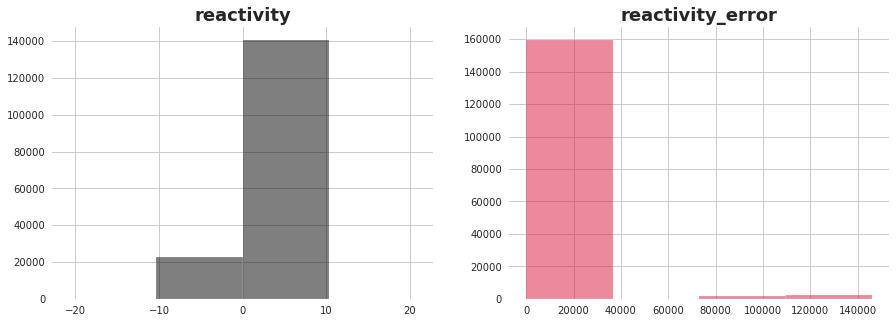

In [7]:
plotd('reactivity', 'reactivity_error')

* Reactivity values are in the range (-10,10)
* Reactivity error has outliers *(All the features have error outliers)*.

> ### 2-2 Degradation at 50C:

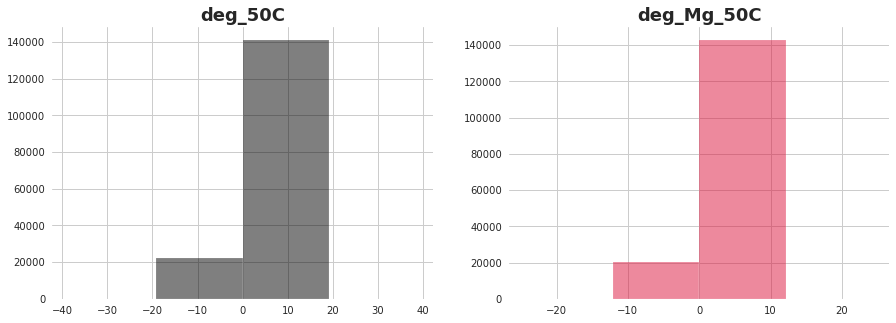

In [8]:
plotd('deg_50C','deg_Mg_50C')

* deg_Mg_50C values are in the range (-12,12).
* deg_50C values are in the range (-19,19).

**At 50C, the degradation values are higher after incubation without magnesium.**


> ### 2-3 Degradation at pH10:

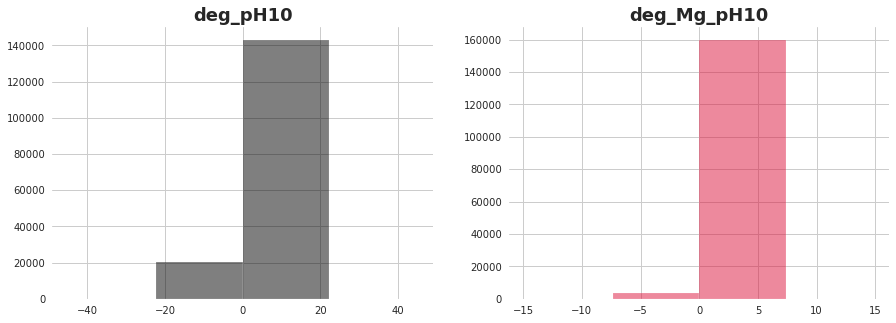

In [9]:
plotd('deg_pH10','deg_Mg_pH10')

* deg_pH10 values are in the range (-20,20)
* deg_Mg_pH10 values are in the range (-7,7)

**At pH=10, the degradation values are higher after incubation without magnesium.**

> ### 2-5 Predicted loop type and structure:

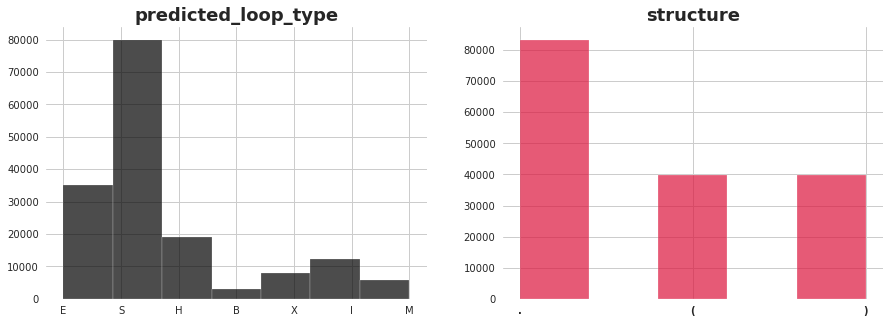

In [10]:
plotc('predicted_loop_type', 'structure')

* S (Paired "Stem") is the dominant loop type.
* E (Dangling End) and H (Hairpin Loop) are also highly represented in comparison with the rest
* **.** structure (unpaired) is dominating, the paired structures **)** and **(** are equally represented (sicne their pair together).

> ### 2-6 Nucleotides:

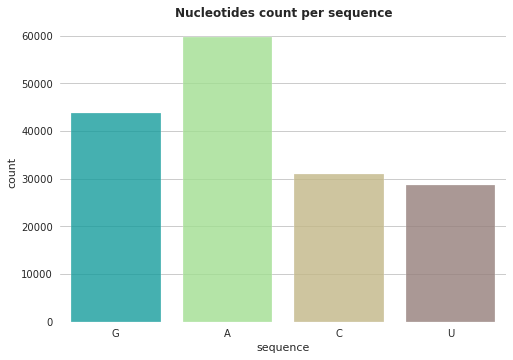

In [11]:
sns.countplot(a['sequence'], palette='terrain', alpha=0.8)
plt.title('Nucleotides count per sequence', weight='bold', fontsize=12)
plt.show()

* **A** and **G** nucleotides are highly present in the sequences compared to **C** and **U**.

# 3- Correlation between features:
> ### 3-1 Numerical features

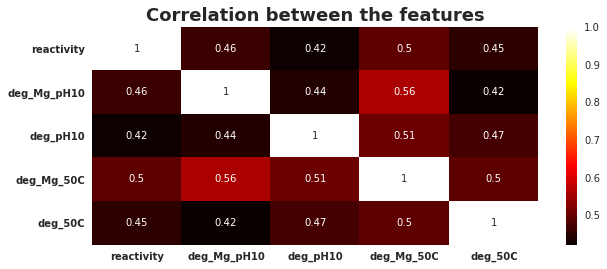

In [12]:
b=a[['reactivity', 'deg_Mg_pH10',
                                  'deg_pH10', 'deg_Mg_50C', 'deg_50C']]

ploth(b, 10, 4)

* Most correlation values are around 0.5, we can consider our variables **moderately correlated.**

> ### 3-2 Categorical variables:

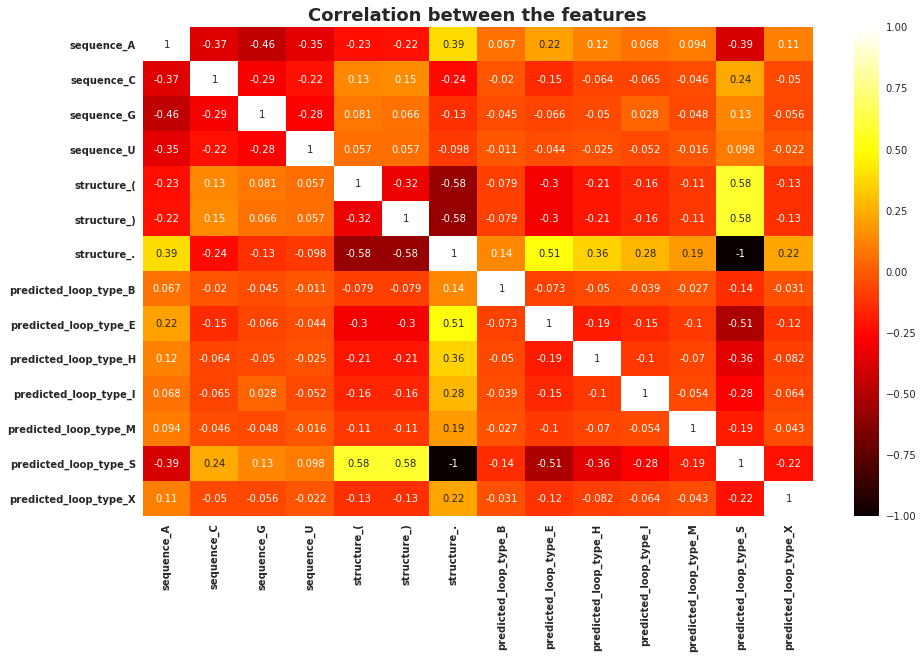

In [13]:
c= a[['id', 'sequence', 'structure', 'predicted_loop_type']]
c= pd.get_dummies(c, columns=['sequence', 'structure', 'predicted_loop_type'])
ploth(c)

**The correlation between categorical variables is more interesting:**
* The correlation between structure . and loop type S *(Paired)* is **-1**
* The correlation between structure ( and ) and loop type S is **0.58**

This is a given, in the data description: *Paired bases are denoted by opening and closing parentheses*
***
# 4- Baseline: NN + Gradient Boosting

* Gradient boosting with MultiLabelOutput fits one regressor per target. It doesn't consider the correlation between the targets, in this case we have moderately correlated targets *(0.5)*

* Neural nets take advantage of correlations between targets.

* In **VERSION 9:** I try a NN with 3 embedding layers for our 3 categorical variables instead of one-hot-encoding.

> ### 4-1 Preprocessing:

In [14]:
#Filter public and private sets
public_df = test.query("seq_length == 107").copy()
private_df = test.query("seq_length == 130").copy()

#trunc= trunc.apply(lambda x: x.str.slice(0, 68))
#trunc2= trunc2.apply(lambda x: x.str.slice(0, 91))
#trunc=public_df[['sequence']]
#trunc2=private_df[['sequence']]
#public_df['sequence']=trunc['sequence']
#private_df['sequence']=trunc2['sequence']

#PUBLIC SET
public_data = []
for mol_id in public_df['id'].unique():
    sample_data = public_df.loc[public_df['id'] == mol_id]
    for i in range(68):
        sample_tuple = (sample_data['id'].values[0] + '_' + str(i),
                        sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i], 
                        sample_data['predicted_loop_type'].values[0][i],
                        )
        public_data.append(sample_tuple)

pudf_=pd.DataFrame(public_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type'])
        

#PRIVATE SET
private_data = []
for mol_id in private_df['id'].unique():
    sample_data = private_df.loc[private_df['id'] == mol_id]
    for i in range(91):
        sample_tuple = (sample_data['id'].values[0] + '_' + str(i),
                        sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i], sample_data['predicted_loop_type'].values[0][i],
                        )
        private_data.append(sample_tuple)
        
prdf_=pd.DataFrame(private_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type'])


#ENCODE CATEGORICAL FEATURES IN PUBLIC AND PRIVATE SETS
#X2= pd.get_dummies(pudf, columns=['sequence', 'structure', 'predicted_loop_type'])
#X3= pd.get_dummies(prdf, columns=['sequence', 'structure', 'predicted_loop_type'])


#DROP ID
#X2= X2.drop('id', axis=1)
#X3= X3.drop('id', axis=1)
#X=c.drop('id', axis=1)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
df = OrdinalEncoder(dtype="int").fit_transform(a[['id', 'sequence', 'structure', 'predicted_loop_type']])
df=pd.DataFrame(df, columns=['id', 'sequence', 'structure', 'predicted_loop_type'] )
#validation
valid_x= df[df['id']==2399]
dense_cols=['sequence', 'structure', 'predicted_loop_type']


pudf = OrdinalEncoder(dtype="int").fit_transform(pudf_[['id', 'sequence', 'structure', 'predicted_loop_type']])
prdf = OrdinalEncoder(dtype="int").fit_transform(prdf_[['id', 'sequence', 'structure', 'predicted_loop_type']])

pudf=pd.DataFrame(pudf, columns=['id', 'sequence', 'structure', 'predicted_loop_type'] )
prdf=pd.DataFrame(prdf, columns=['id', 'sequence', 'structure', 'predicted_loop_type'] )

def make_X(df):
    X = {"dense1": df[dense_cols].to_numpy()}
    for i, v in enumerate(dense_cols):
        X[v] = df[[v]].to_numpy()
    return X

X2= make_X(pudf)
X3= make_X(prdf)

df=make_X(df)

de = np.split(b, b.shape[1], axis=1)

valid_x=make_X(valid_x)

valid_y=b[['reactivity']].tail(68)
valid_y = np.split(valid_y, valid_y.shape[1], axis=1)

> ### 4-2 MODEL:

In [16]:
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
import keras.models as models
import keras.layers as layers
from keras import regularizers
import numpy.random as nr
import keras
from keras.layers import Dropout, BatchNormalization
import keras.layers as layers
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Input, Embedding, Dropout, concatenate, Flatten
from tensorflow.keras.models import Model
import gc
import os
from tqdm.notebook import tqdm

In [17]:
def create_model():
    tf.random.set_seed(173)

    tf.keras.backend.clear_session()
    gc.collect()

    # Dense input
    dense_input = Input(shape=(len(dense_cols), ), name='dense1')

    # Embedding input
    sequence = Input(shape=(1,), name='sequence')
    structure = Input(shape=(1,), name='structure')
    loop = Input(shape=(1,), name='predicted_loop_type')
    
    sequence_emb = Flatten()(Embedding(4, 1)(sequence))
    structure_emb = Flatten()(Embedding(3, 1)(structure))
    loop_emb = Flatten()(Embedding(7, 1)(loop))
    

    # Combine dense and embedding parts and add dense layers. Exit on linear scale.
    x = concatenate([dense_input, sequence_emb, structure_emb, loop_emb])
    x = Dense(512, activation="tanh")(x)
    x=  Dropout(0.2)(x)
    x = Dense(256, activation="tanh")(x)
    x=  Dropout(0.2)(x)
    x = Dense(128, activation="tanh")(x)
    x=  Dropout(0.2)(x)
    x = Dense(64, activation="tanh")(x)
    x=  Dropout(0.2)(x)
    x = Dense(16, activation="tanh")(x)
    outputs = Dense(5, name='output')(x)

    inputs = {"dense1": dense_input, "seq": sequence, "structure": structure, "loop": loop}

    # Connect input and output
    model = Model(inputs, outputs)

    model.compile(loss=keras.losses.mean_squared_error,
                  metrics=["mse"],
                  optimizer=keras.optimizers.Adam())
    return model

In [18]:
model = create_model()
history = model.fit(df, 
                    de,
                    batch_size=64,
                    epochs=50
                    #,shuffle=True
                    ,callbacks=[tf.keras.callbacks.ReduceLROnPlateau(), tf.keras.callbacks.ModelCheckpoint('model.h5')]
                    #,validation_data=(valid_x, valid_y))
                   ,validation_split=0.33)

Epoch 1/50
1709/1709 [==============================] - 8s 5ms/step - loss: 0.4997 - mse: 0.4997 - val_loss: 0.4725 - val_mse: 0.4725
Epoch 2/50
1709/1709 [==============================] - 8s 5ms/step - loss: 0.4916 - mse: 0.4916 - val_loss: 0.4710 - val_mse: 0.4710
Epoch 3/50
1709/1709 [==============================] - 8s 5ms/step - loss: 0.4898 - mse: 0.4898 - val_loss: 0.4677 - val_mse: 0.4677
Epoch 4/50
1709/1709 [==============================] - 8s 5ms/step - loss: 0.4877 - mse: 0.4877 - val_loss: 0.4652 - val_mse: 0.4652
Epoch 5/50
1709/1709 [==============================] - 8s 5ms/step - loss: 0.4865 - mse: 0.4865 - val_loss: 0.4642 - val_mse: 0.4642
Epoch 6/50
1709/1709 [==============================] - 8s 5ms/step - loss: 0.4861 - mse: 0.4861 - val_loss: 0.4727 - val_mse: 0.4727
Epoch 7/50
1709/1709 [==============================] - 8s 5ms/step - loss: 0.4861 - mse: 0.4861 - val_loss: 0.4640 - val_mse: 0.4640
Epoch 8/50
1709/1709 [==============================] - 8s 5ms

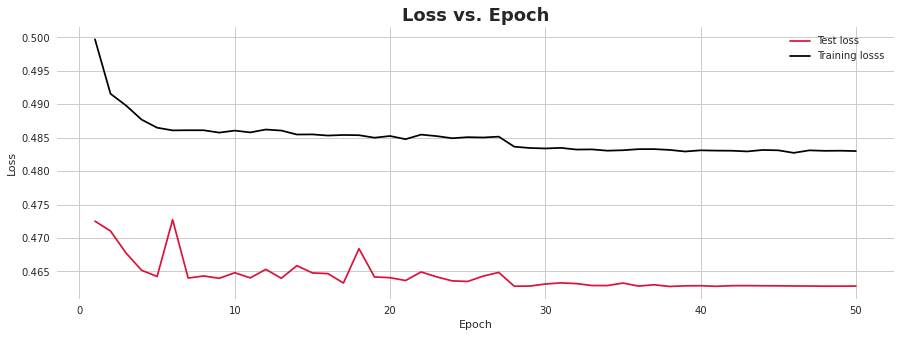

In [19]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
train_loss = history.history['loss']
test_loss = history.history['val_loss']
x = list(range(1, len(test_loss) + 1))
plt.plot(x, test_loss, color = 'crimson', label = 'Test loss')
plt.plot(x, train_loss,color='black', label = 'Training losss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch',weight='bold', fontsize=18)


plt.show()

In [20]:
#PREDICT PUBLIC AND PRIVATE SETS
public_preds = model.predict(X2)
private_preds = model.predict(X3)

In [21]:
#MULTIOUTPUTREGRESSOR FOR MULTILABEL TASK
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
#model= MultiOutputRegressor(GradientBoostingRegressor(random_state=42)).fit(X, b)

#PREDICT PUBLIC SET
#public_preds=model.predict(X2)

#PREDICT PRIVATE SET
#private_preds=model.predict(X3)

#DATAFRAMES OF PREDS
pu_predictions= pd.DataFrame(public_preds, columns=b.columns)
pr_predictions= pd.DataFrame(private_preds, columns=b.columns)

> ### 4-3 SUBMISSION

In [22]:
#ADD id_seqpos to merge later with the submission file
pu_predictions['id_seqpos']= pudf_['id']
pr_predictions['id_seqpos']= prdf_['id']
#CONCAT PUBLIC AND PRIVATE SET
final= pd.concat([pu_predictions, pr_predictions])
#MERGE WITH SUB FILE
sub1=sub.merge(final, on='id_seqpos', how='left')
#DROP AND RENAME SUB COLUMNS
sub1= sub1.drop(['reactivity_x', 'deg_Mg_pH10_x', 'deg_pH10_x', 'deg_Mg_50C_x', 'deg_50C_x'], axis=1)
sub1= sub1.rename(columns= {'reactivity_y':'reactivity','deg_Mg_pH10_y':'deg_Mg_pH10',
                     'deg_pH10_y':'deg_pH10', 'deg_Mg_50C_y':'deg_Mg_50C',
                     'deg_50C_y':'deg_50C'})
#FILL NA WITH 0 (NONSCORED SEQUENCES)
submission= sub1.fillna(0)

In [23]:
submission.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.782215,0.781267,0.781435,0.781156,0.781472
1,id_00073f8be_1,0.782215,0.781267,0.781435,0.781156,0.781472
2,id_00073f8be_2,0.578239,0.578504,0.578349,0.578190,0.578408
3,id_00073f8be_3,0.578239,0.578504,0.578349,0.578190,0.578408
4,id_00073f8be_4,0.578239,0.578504,0.578349,0.578190,0.578408


In [24]:
submission.to_csv('submission.csv', index=False)